<a href="https://colab.research.google.com/github/sarmilaPS/EDA/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Exploratory** **Data Analysis on Titanic Dataset**

###Objective



The primary goal of working on this data is to predict whether a passenger had survived based on attributes that are provided in the dataset.

The following steps are used to explore the data.

1. Import different libraries.
2. Read file and display the columns.
3. Calculate basic statistics (i.e. mean, stardard deviation etc. )using describe function from panda library.
4. Data shape, Data types and Nan value.
5. Visualize data - Seaborn (heatmap, countplot, boxplot)
6. Visualize data - pandas (crosstab) 
7. Visualize data - matplotlib (histogram, piechart)

In [ ]:
import pandas
import seaborn
import matplotlib.pyplot as plt

Displaying data set from the provided source csv file.

In [ ]:
titanic_data = pandas.read_csv('drive/MyDrive/bootcamp/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Data Description:


1.   **PassengerId** : Unique number of id provided to passenger
2.   **Survived** : whether passenger is survived or not. 0 denotes dead and 1 denotes alive.
3.   **Pclass** : Passenger of class (1st, 2nd, 3rd)
4.   **Name** : Name of passenger travelled in the ship
5.   **Sex** : Gender of passenger (male or female)
6.   **Age** : Age of passenger
7.   **SibSp** : Number of siblings/spouses aboard.
8.   **Parch** : Number of parents/children aboard
9.   **Ticket** : Ticket number issued to passenger.
10.  **Fare** : Price of ticket that traveller paid.
11.  **Cabin** : Cabin details where passenger resided.
12.  **Embarked** : Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)



The provided data source has 891 row and 12 column.

In [ ]:
titanic_data.shape

(891, 12)

The provided datset contains passenger ticket information along with personal details.

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Finding the unique value in different columns.


In [ ]:
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The datset contains dead and survial count of 549 and 342 respectively.

In [ ]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Similarly we can find the unique counts of every column.

On this dataset, we see mean, standard deviation, minimum age and maximum age of passenger i.e. 29.70, 14.52, 0.42, 80 years respectively.

In [ ]:
titanic_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We can even calculate statistical values of column with the data type of integer and floating value.

The dataset has no information of 177 rows in Age, 687 rows in Cabin and 2 rows in Embarked column.

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###Data Visualization

####Seaborn

This dataset shows null data of Age and Cabin column.

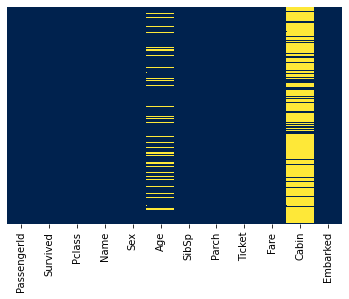

In [ ]:
import seaborn
seaborn.heatmap(titanic_data.isnull(), xticklabels = True, yticklabels = False,cbar =False,cmap = 'cividis')

In this dataset, unwanted data has been pre-processed to see the correlation between the features.

In [ ]:
df_titanic = titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df_titanic['Sex'] = df_titanic['Sex'].replace('male', 1)
df_titanic['Sex'] = df_titanic['Sex'].replace('female', 0)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('S',0)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('C',1)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('Q',2)

df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


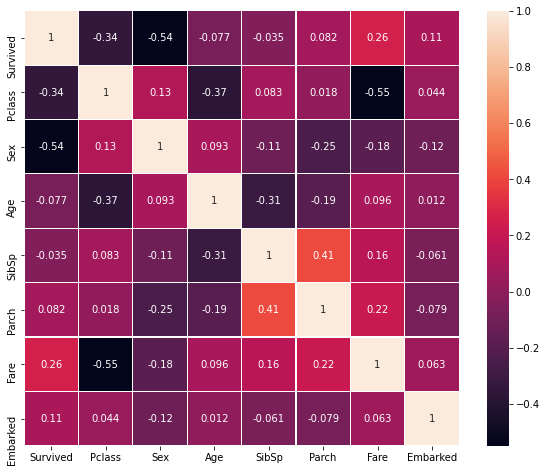

In [ ]:
plt.figure(figsize=(10,8))
seaborn.heatmap(df_titanic.astype(float).corr(),linewidths=0.1,square=True, linecolor='white',annot=True)
plt.show()

In this dataset, we see number of dead and survived passenger in pictorial form.

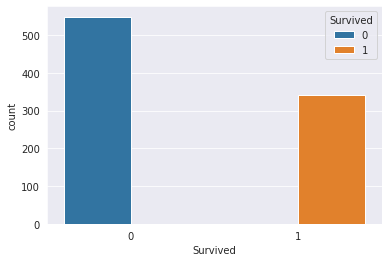

In [ ]:
seaborn.set_style('darkgrid')
seaborn.countplot(x='Survived', hue ='Survived', data=titanic_data)

From the above graph it is clear that number of survival is lower compared to death. Out of 891 persons in this dataset only 342,    38.38% of total dataset survived. We will get more insight of data by exploring more.



In [ ]:
titanic_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 314. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can also be seen clearly in following graph.

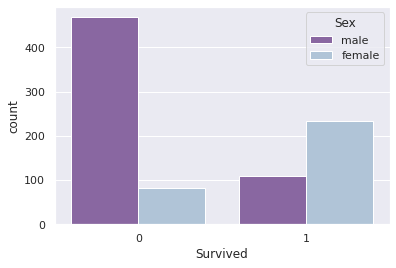

In [ ]:
seaborn.set_style('darkgrid')
seaborn.countplot(x='Survived',hue='Sex',data=titanic_data,palette ='BuPu_r')

In this dataset, it is seen that people of 1st class is given higher priority and benn rescued more in comparison to other class. Similarly people from third class couldnot be rescued which results in 75% of total 3rd class passenger is dead.

In [ ]:
titanic_data.groupby (['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

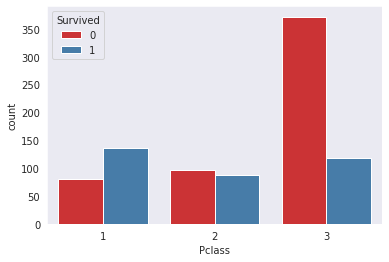

In [ ]:
import seaborn
seaborn.set_style('dark')
seaborn.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='Set1')

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.



In [ ]:
ge

The dataset shows high ratio of outlier in 2nd & 3rd passenger class with respect to the age. The average age in 1st, 2nd and 3rd are approximately 38, 29 and 25 years respectively.

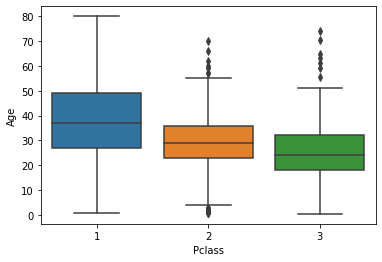

In [ ]:
import seaborn
seaborn.boxplot(x='Pclass',y='Age',data=titanic_data)


####Pandas

The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.
And let us see what we can explore with this function

The dataset represents following points:

1. Out of 314 female passengers, 233 are resued out of which 91 ,70 and 72 are from 1st, 2nd and 3rd class respectively.
2. Higher priority is given to female due to which 468 male passengers out of 577 are dead.

In [ ]:
pandas.crosstab([titanic_data.Sex,titanic_data.Survived],titanic_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

The dataset represents following points:

1. 268 Passengers without siblings & spouse from 3rd class is dead which is 48.81% of total dead passenger.

2. The level of priority is given on the basis of class and sibling/spouse to 1st class passengers. Out of 342 rescued passengers, 39.7% of total rescued passenger are from 1st class.



In [ ]:
pandas.crosstab([titanic_data.Survived,titanic_data.Pclass],titanic_data.SibSp,margins=True)

SibSp              0    1   2   3   4  5  8  All
Survived Pclass                                 
0        1        60   18   1   1   0  0  0   80
         2        70   23   4   0   0  0  0   97
         3       268   56  10  11  15  5  7  372
1        1        77   53   4   2   0  0  0  136
         2        50   32   4   1   0  0  0   87
         3        83   27   5   1   3  0  0  119
All              608  209  28  16  18  5  7  891

####Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.



In this dataset, we see the age group between 20 to 30 has travelled in highest number.

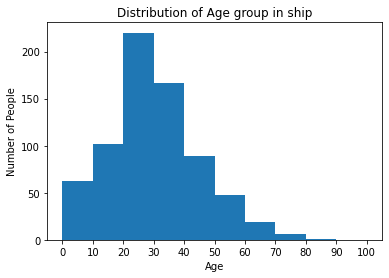

In [ ]:
import pandas 
import matplotlib.pyplot as plt

titanic_data = pandas.read_csv('drive/MyDrive/bootcamp/train.csv')

bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(titanic_data.Age, bins)
plt.xticks(bins)
plt.ylabel('Number of People')
plt.xlabel('Age')
plt.title('Distribution of Age group in ship')
plt.show()


The dataset pictures that there're 24.2% in first class, 20.7% in 2nd class and 55.1% in 3rd class out of total passengers in the ship.

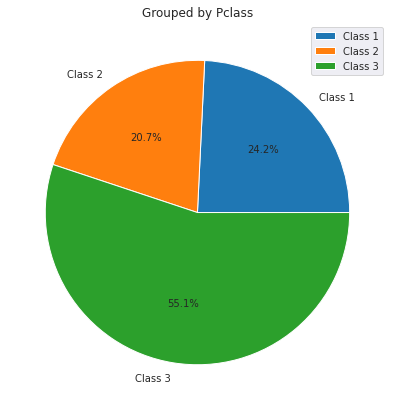

In [ ]:
import matplotlib.pyplot as plt
import pandas
titanic_data = pandas.read_csv('drive/MyDrive/bootcamp/train.csv')
pclass_count = titanic_data.groupby('Pclass')['Pclass'].count()

plt.figure(figsize=(7,7))
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], autopct= '%1.1f%%', textprops={'fontsize':10})
plt.title ('Grouped by Pclass')
plt.legend (['Class 1', 'Class 2', 'Class 3'])
plt.show()


Furthermore, we can also display gender and embarkation distribution pie chart using the exact same method.


###**Observations** : 

1.   Females were given higher priority in the rescue operation than male.
2.   The first class people were given higher priority than the second class than the third class.
3.   The features such as Age, Siblings Onboard and Parents onboard didn't have major influence on the survival probability.